# NLP: Prepare and chart data

## Imports

In [1]:
import pandas as pd
import numpy as np
from numpy import cumprod, linspace, random
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

## Functions

In [2]:
def create_chart(date_range, features, df, height=10, sharey=False, title=''):
    n_rows = len(features)
    fig, ax = plt.subplots(n_rows, 1, sharey=sharey, sharex=False, figsize=(13,height))
    
    for i in range(len(ax)):
        ax[i].plot(date_range, df[features[i]])
        ax[i].legend(frameon = 1, facecolor=('white'))
    
    set_shared_ylabel(fig, ax, '% of total articles')
    plt.suptitle(title, y=0.90, fontsize=12)
    plt.xlabel('Date')

    return fig

In [3]:
def set_shared_ylabel(f, a, ylabel, labelpad = 0.01):
    f.canvas.draw()
    top = a[0].get_position().y1
    bottom = a[-1].get_position().y0

    x0 = 1
    for at in a:
        at.set_ylabel('')
        bboxes, _ = at.yaxis.get_ticklabel_extents(f.canvas.renderer)
        bboxes = bboxes.inverse_transformed(f.transFigure)
        xt = bboxes.x0
        if xt < x0:
            x0 = xt
    tick_label_left = x0

    a[-1].set_ylabel(ylabel)
    a[-1].yaxis.set_label_coords(tick_label_left - labelpad,(bottom + top)/2, transform=f.transFigure)

In [4]:
def amend_labels(s):
    
    d = {'Brexit / EU referendum':'UK', 'Obama':'US', 'Trump':'US', 'UK politics':'UK', 'Economic releases':'Economic growth'}
    if s in d.keys():
        return d[s]
    else:
        return s

## Load data

In [5]:
df = pd.read_csv('labelled_articles.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df.datetime.dt.normalize()
df.drop(['datetime', 'text_snowball'], axis=1, inplace=True)

In [6]:
df.head()

,source,title,url,new_km_150,label,date
0,Guardian,$135 and rising ... has cheap oil gone for ever?,https://www.theguardian.com/business/2008/may/...,105,Oil,2008-05-23
1,Guardian,$2 pound sails into the sunset,https://www.theguardian.com/business/2007/aug/...,139,Sterling,2007-08-15
2,Guardian,$2tn debt crisis threatens to bring down 100 U...,https://www.theguardian.com/business/2010/dec/...,92,Cities,2010-12-20
3,Guardian,'A dream deal',https://www.theguardian.com/business/2005/jan/...,23,Retail sales / consumer spending,2005-01-28
4,Guardian,'A landscape of exhaustion and moral decay' – ...,https://www.theguardian.com/business/2016/dec/...,131,Miscellaneous,2016-12-06


### Combine a few sub-category labels together

In [7]:
df['label'] = df['label'].apply(amend_labels)

## Explore

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84155 entries, 0 to 84154
Data columns (total 6 columns):
source        84155 non-null object
title         84155 non-null object
url           84155 non-null object
new_km_150    84155 non-null int64
label         84155 non-null object
date          84155 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 3.9+ MB


## Article count by year

In [9]:
by_year = df.groupby(df.date.dt.year)['label'].count().reset_index()

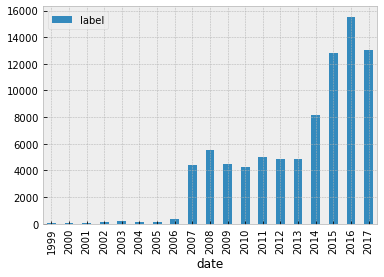

In [10]:
by_year.plot(kind='bar', x='date')

## Remove articles pre-2008

In [11]:
df.head()

,source,title,url,new_km_150,label,date
0,Guardian,$135 and rising ... has cheap oil gone for ever?,https://www.theguardian.com/business/2008/may/...,105,Oil,2008-05-23
1,Guardian,$2 pound sails into the sunset,https://www.theguardian.com/business/2007/aug/...,139,Sterling,2007-08-15
2,Guardian,$2tn debt crisis threatens to bring down 100 U...,https://www.theguardian.com/business/2010/dec/...,92,Cities,2010-12-20
3,Guardian,'A dream deal',https://www.theguardian.com/business/2005/jan/...,23,Retail sales / consumer spending,2005-01-28
4,Guardian,'A landscape of exhaustion and moral decay' – ...,https://www.theguardian.com/business/2016/dec/...,131,Miscellaneous,2016-12-06


In [12]:
df_2008_onwards = df[df['date'].dt.year >= 2008]

In [13]:
df_2008_onwards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78650 entries, 0 to 84154
Data columns (total 6 columns):
source        78650 non-null object
title         78650 non-null object
url           78650 non-null object
new_km_150    78650 non-null int64
label         78650 non-null object
date          78650 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.2+ MB


In [14]:
df_2008_onwards.head()

,source,title,url,new_km_150,label,date
0,Guardian,$135 and rising ... has cheap oil gone for ever?,https://www.theguardian.com/business/2008/may/...,105,Oil,2008-05-23
2,Guardian,$2tn debt crisis threatens to bring down 100 U...,https://www.theguardian.com/business/2010/dec/...,92,Cities,2010-12-20
4,Guardian,'A landscape of exhaustion and moral decay' – ...,https://www.theguardian.com/business/2016/dec/...,131,Miscellaneous,2016-12-06
5,Guardian,'A million jobs for world's poorest' with UK c...,https://www.theguardian.com/global-development...,112,World Bank,2012-04-15
6,Guardian,'A system of privilege and benefits': is a glo...,https://www.theguardian.com/global-development...,149,Tax,2016-04-11


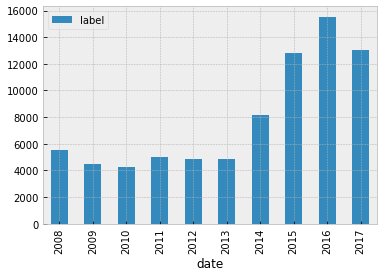

In [15]:
by_year = df_2008_onwards.groupby(df_2008_onwards.date.dt.year)['label'].count().reset_index()
by_year.plot(kind='bar', x='date')

## Arrange by date

In [16]:
df_2008_onwards.head()

,source,title,url,new_km_150,label,date
0,Guardian,$135 and rising ... has cheap oil gone for ever?,https://www.theguardian.com/business/2008/may/...,105,Oil,2008-05-23
2,Guardian,$2tn debt crisis threatens to bring down 100 U...,https://www.theguardian.com/business/2010/dec/...,92,Cities,2010-12-20
4,Guardian,'A landscape of exhaustion and moral decay' – ...,https://www.theguardian.com/business/2016/dec/...,131,Miscellaneous,2016-12-06
5,Guardian,'A million jobs for world's poorest' with UK c...,https://www.theguardian.com/global-development...,112,World Bank,2012-04-15
6,Guardian,'A system of privilege and benefits': is a glo...,https://www.theguardian.com/global-development...,149,Tax,2016-04-11


### Daily counts

In [17]:
daily_counts = df_2008_onwards.groupby(['date', 'label'])['title'].count().reset_index()

In [18]:
daily_counts.index = daily_counts['date']

In [19]:
daily_counts.head()

,date,label,title
date,,,
2008-01-01,2008-01-01,Companies,1
2008-01-01,2008-01-01,Economic growth,1
2008-01-02,2008-01-02,Economic growth,1
2008-01-02,2008-01-02,European banks,1
2008-01-02,2008-01-02,European stocks,4


In [20]:
daily_pivot = daily_counts.pivot(index='date', columns='label', values='title')

In [21]:
daily_pivot = daily_pivot.fillna(0)

In [22]:
daily_pivot.head()

label,Australia / New Zealand,Bank of England,Banking & regulation,Bonds,Central banks,China / Hong Kong,China economy,China stocks,Cities,Climate change,...,Scotland,South Africa,Speculative positioning,Sterling,Tax,UK,UK stocks,US,US stocks,World Bank
date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2008-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2008-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Weekly counts

In [23]:
weekly_counts = daily_pivot.resample('w').sum()
weekly_counts.fillna(0)
weekly_counts.sample(5)

label,Australia / New Zealand,Bank of England,Banking & regulation,Bonds,Central banks,China / Hong Kong,China economy,China stocks,Cities,Climate change,...,Scotland,South Africa,Speculative positioning,Sterling,Tax,UK,UK stocks,US,US stocks,World Bank
date,,,,,,,,,,,,,,,,,,,,,
2010-12-26,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2011-05-29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,0.0,4.0
2013-05-05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,...,0.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0
2012-08-12,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2014-01-19,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0


In [24]:
cols = weekly_counts.columns
weekly_counts = weekly_counts.fillna(0)
weekly_counts.sample(10)

label,Australia / New Zealand,Bank of England,Banking & regulation,Bonds,Central banks,China / Hong Kong,China economy,China stocks,Cities,Climate change,...,Scotland,South Africa,Speculative positioning,Sterling,Tax,UK,UK stocks,US,US stocks,World Bank
date,,,,,,,,,,,,,,,,,,,,,
2017-04-16,0.0,0.0,2.0,3.0,4.0,9.0,3.0,12.0,8.0,0.0,...,0.0,8.0,2.0,5.0,4.0,1.0,20.0,25.0,41.0,1.0
2008-05-25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0
2015-10-18,0.0,1.0,2.0,0.0,0.0,6.0,8.0,5.0,0.0,2.0,...,0.0,0.0,2.0,0.0,3.0,11.0,27.0,0.0,48.0,0.0
2015-11-22,0.0,0.0,3.0,1.0,0.0,6.0,2.0,5.0,1.0,1.0,...,0.0,0.0,4.0,0.0,1.0,2.0,24.0,0.0,49.0,0.0
2008-03-30,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2011-04-17,0.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,3.0
2009-11-15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2008-04-13,0.0,6.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
2014-07-20,5.0,1.0,1.0,1.0,0.0,9.0,0.0,0.0,2.0,0.0,...,0.0,0.0,1.0,5.0,0.0,3.0,14.0,0.0,19.0,2.0


## Counts as percent of total

In [25]:
weekly_counts_pct = weekly_counts.copy(deep=True)
weekly_counts_pct = weekly_counts_pct.fillna(0)
weekly_counts_pct[cols] = weekly_counts_pct[cols].div(weekly_counts_pct[cols].sum(axis=1), axis=0) * 100
weekly_counts_pct = weekly_counts_pct.fillna(0)
weekly_counts_pct.sample(10)

label,Australia / New Zealand,Bank of England,Banking & regulation,Bonds,Central banks,China / Hong Kong,China economy,China stocks,Cities,Climate change,...,Scotland,South Africa,Speculative positioning,Sterling,Tax,UK,UK stocks,US,US stocks,World Bank
date,,,,,,,,,,,,,,,,,,,,,
2014-01-12,0.0,1.219512,4.878049,0.000000,0.000000,0.0,3.658537,0.0,1.219512,0.000000,...,0.00,1.219512,0.0,0.000000,0.000000,2.439024,0.000000,0.000000,0.0,2.439024
2009-04-19,0.0,2.173913,1.086957,0.000000,0.000000,0.0,0.000000,0.0,3.260870,0.000000,...,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2010-01-03,0.0,0.000000,2.500000,0.000000,0.000000,0.0,2.500000,0.0,0.000000,0.000000,...,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2013-07-14,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,5.333333,0.000000,...,0.00,1.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2013-10-20,0.0,2.500000,2.500000,0.000000,0.000000,0.0,1.250000,0.0,0.000000,0.000000,...,1.25,0.000000,0.0,0.000000,1.250000,1.250000,0.000000,8.750000,0.0,1.250000
2013-09-08,0.0,5.194805,1.298701,1.298701,0.000000,0.0,0.000000,0.0,2.597403,1.298701,...,0.00,0.000000,0.0,0.000000,0.000000,2.597403,0.000000,1.298701,0.0,0.000000
2008-12-21,0.0,0.990099,0.000000,0.000000,2.970297,0.0,0.990099,0.0,2.970297,0.000000,...,0.00,0.000000,0.0,2.970297,0.000000,0.000000,0.000000,0.990099,0.0,0.000000
2010-06-13,0.0,1.265823,1.265823,0.000000,0.000000,0.0,0.000000,0.0,1.265823,0.000000,...,0.00,0.000000,0.0,0.000000,0.000000,2.531646,2.531646,0.000000,0.0,0.000000
2011-12-25,0.0,1.515152,6.060606,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.00,0.000000,0.0,0.000000,4.545455,3.030303,0.000000,0.000000,0.0,0.000000


## Plot

In [26]:
dates = weekly_counts_pct.reset_index()['date']

### The economy

In [27]:
economic_charts = ['Tax', 'Inequality, Capitalism', 'Retail sales / consumer spending', 'Public finances',
                  'Manufacturing and services', 'Labour market', 'Inflation', 'Household income & welfare',
                  'House prices', 'Economic growth']

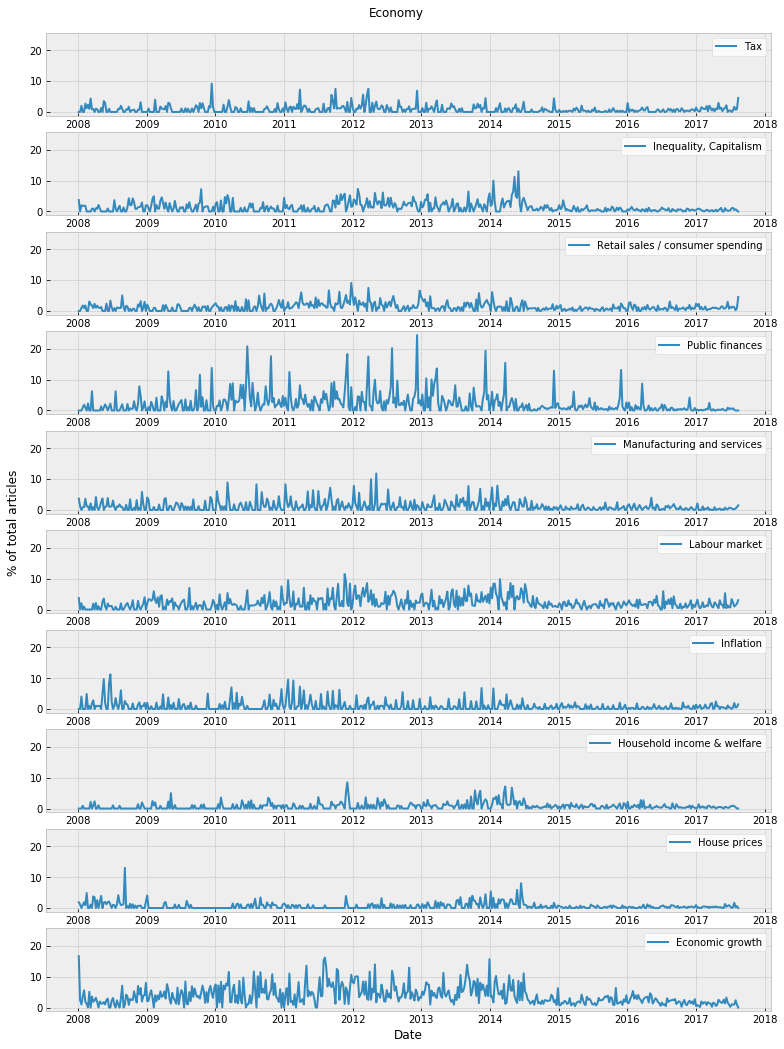

In [28]:
economy_chart = create_chart(dates, economic_charts, weekly_counts_pct, height=18, sharey=True, title='Economy')

In [29]:
economy_chart.savefig('economy_chart', transparent=False, pad_inches=0.2, bbox_inches='tight')

### Country / region specific

In [30]:
country_region = ['Eurozone', 'France', 'Greece', 'Italy', 'Russia', 'Scotland', 'South Africa', 'UK', 'US']

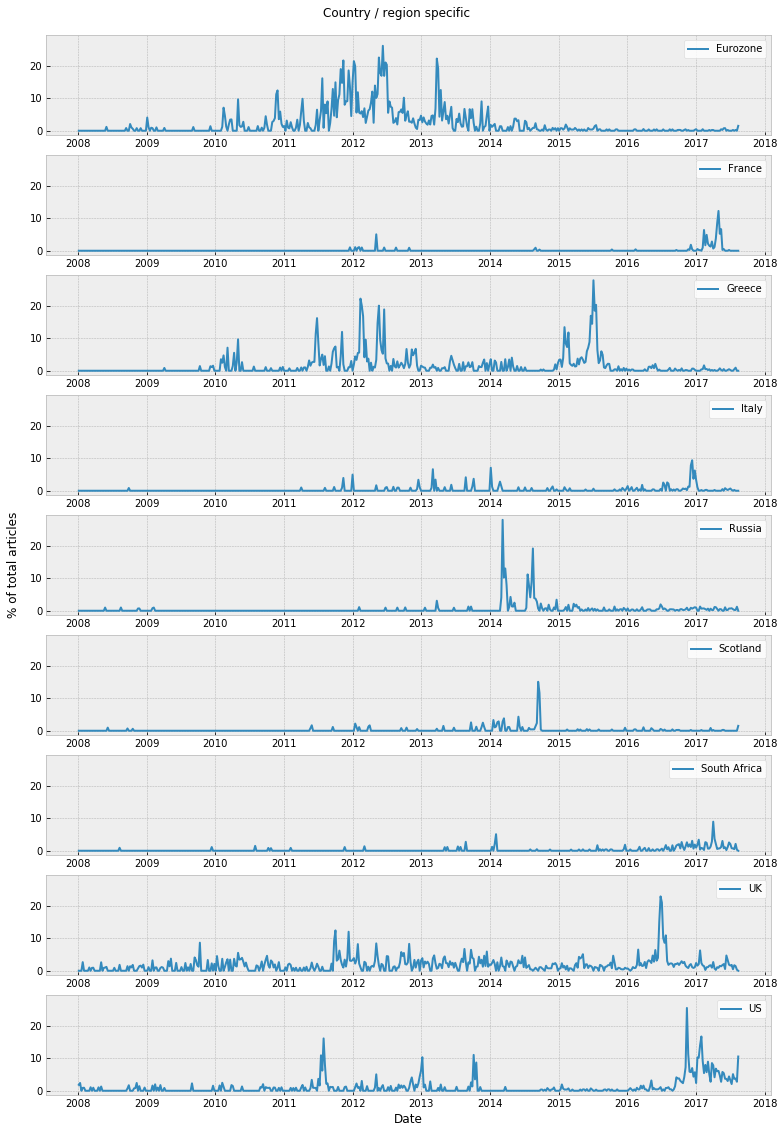

In [31]:
country_region_chart = create_chart(dates, country_region, weekly_counts_pct, height=19.5, sharey=True, 
                              title='Country / region specific')

In [32]:
country_region_chart.savefig('country_region_chart', transparent=False, pad_inches=0.2, bbox_inches='tight')

### Central banks, regulation

In [33]:
other_topics = ['Bank of England', 'Banking & regulation', 'European Central Bank', 'IMF',
               'Fed, rates', 'World Bank']

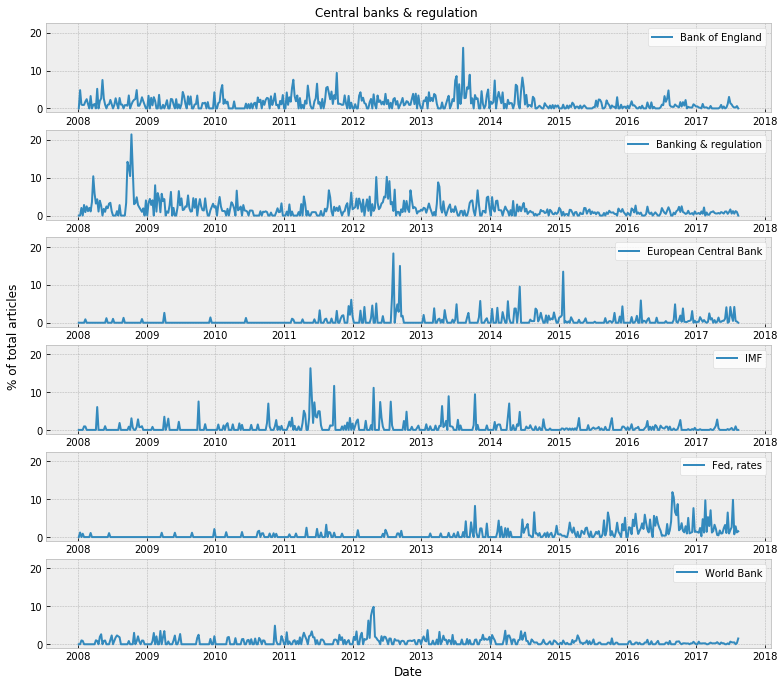

In [34]:
cb_regulation_chart = create_chart(dates, other_topics, weekly_counts_pct, height=11.5, sharey=True, 
                                   title='Central banks & regulation')

In [35]:
cb_regulation_chart.savefig('cb_regulation_chart', transparent=False, pad_inches=0.2, bbox_inches='tight')

## Export to CSV

In [36]:
weekly_counts.to_csv('weekly_data.csv', encoding='utf-8')
weekly_counts_pct.to_csv('weekly_data_pct.csv', encoding='utf-8')